In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
df=pd.read_csv('Advertising Sales Channel Prediction')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [38]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [39]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [42]:
df.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [43]:
df.isnull().sum().sum()

0

In [44]:
df.shape

(200, 5)

In [45]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [47]:
#checking the outliers 

In [48]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [49]:
df = df.drop("Unnamed: 0", axis=1)

In [50]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [51]:
#KDE plot to check the distribution.

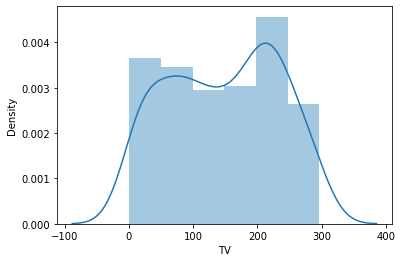

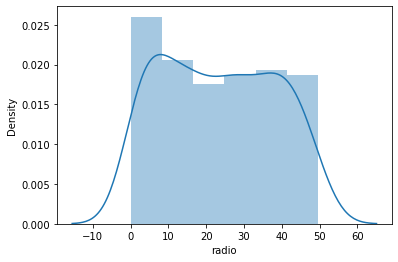

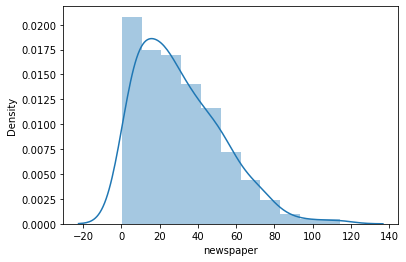

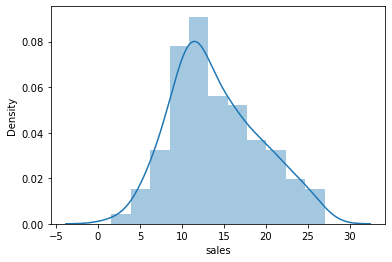

In [52]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

In [53]:
#from the above distribution plot we can say that:
#TV and Radio DO NOT have NORMAL DISTRIBUTION
#Newspaper and sales have likely normal Distribution and it is positvely skewed.

<AxesSubplot:xlabel='TV'>

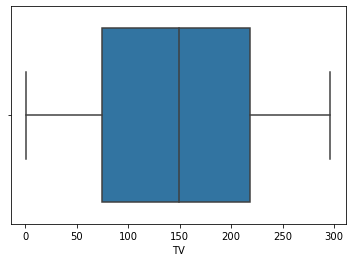

In [54]:
sns.boxplot(df['TV'])

<AxesSubplot:xlabel='radio'>

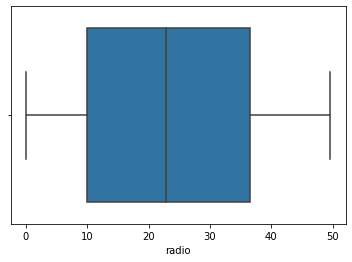

In [55]:
sns.boxplot(df['radio'])

<AxesSubplot:xlabel='newspaper'>

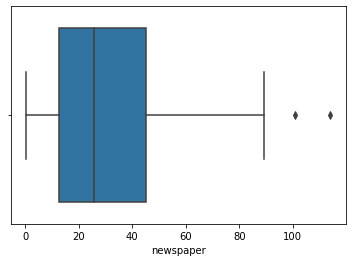

In [56]:
sns.boxplot(df['newspaper'])

<AxesSubplot:xlabel='sales'>

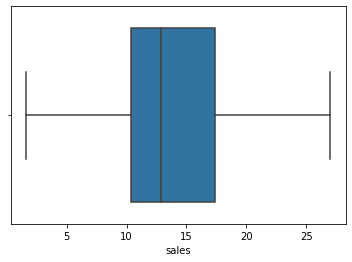

In [57]:
sns.boxplot(df['sales'])

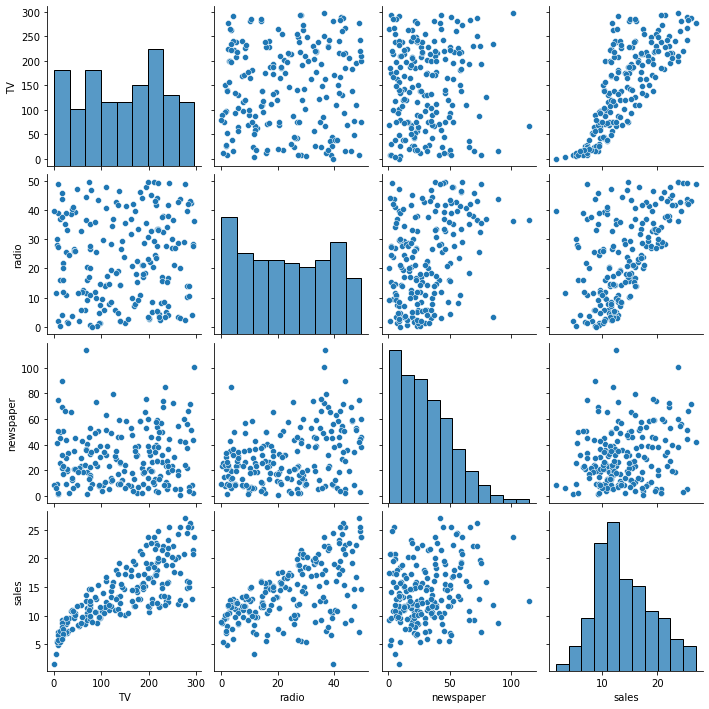

In [59]:
sns.pairplot(df)

In [60]:
# From the above boxplot we can say that there is a outliers in newspaper.

In [61]:
# Remove the skewness

In [62]:
from sklearn.preprocessing import power_transform

df_new = power_transform(df)

In [63]:
pd.DataFrame(df_new).skew().sort_values(ascending = False)

3   -0.007841
2   -0.077942
1   -0.242968
0   -0.315199
dtype: float64

In [64]:
df= pd.DataFrame(df_new, columns = df.columns)

In [65]:
df.skew().sort_values(ascending = False)

sales       -0.007841
newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

In [66]:
df.skew()[np.abs(df.skew())<0.25].all()

True

In [72]:
# Skewness has been removed

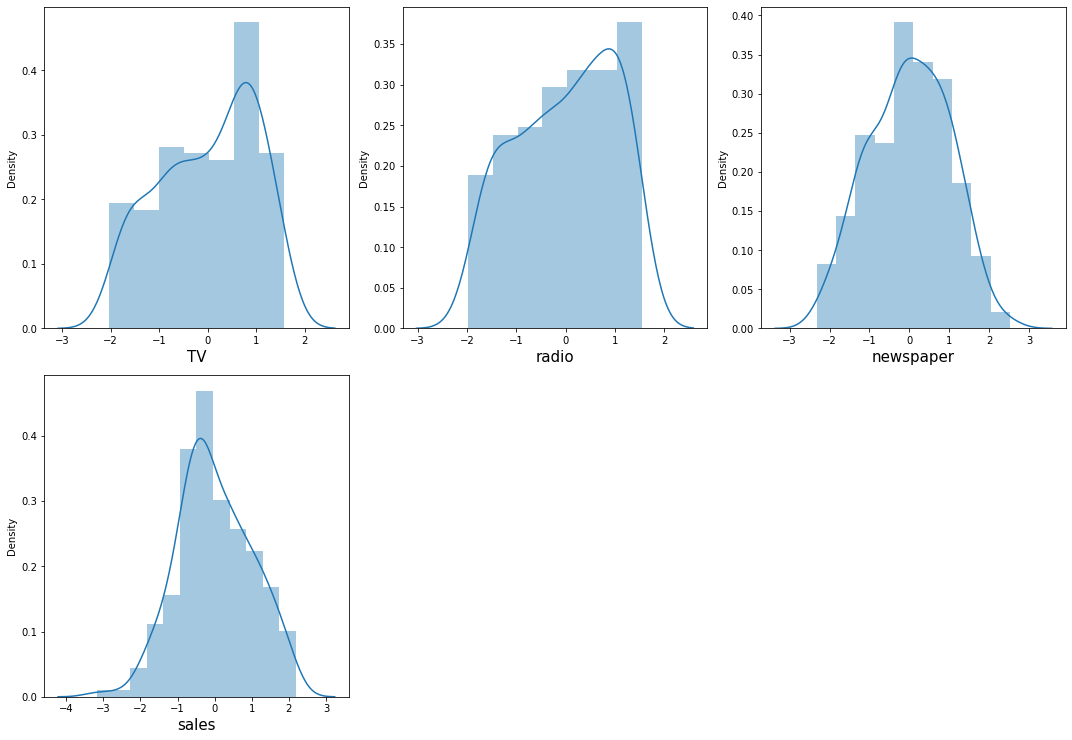

In [68]:
plt.figure(figsize = (15,15))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber +=1
plt.tight_layout()

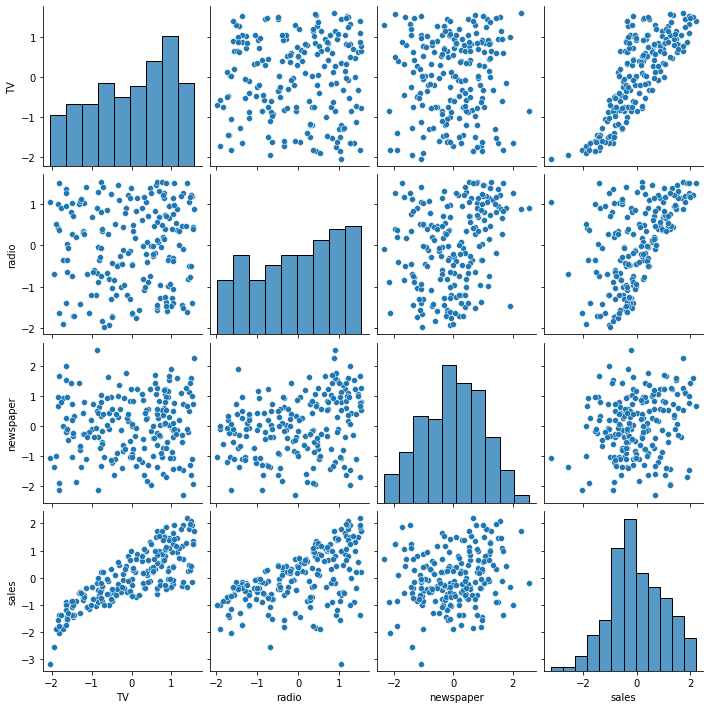

In [69]:
sns.pairplot(df)

In [71]:
df.shape

(200, 4)

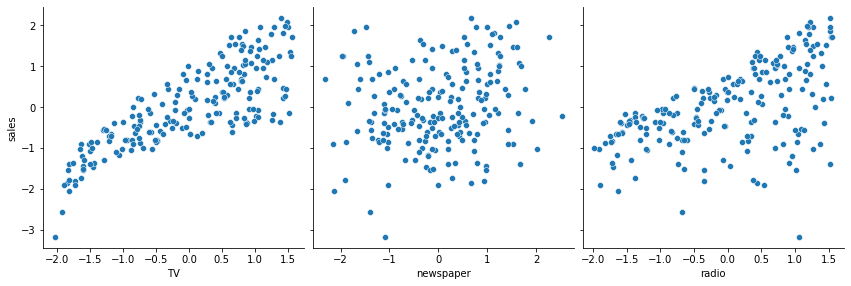

In [79]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter',data=df)
plt.show()

In [80]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.047479,0.041693,0.808657
radio,0.047479,1.000000,0.291462,0.542506
newspaper,0.041693,0.291462,1.000000,0.196643
sales,0.808657,0.542506,0.196643,1.000000


<AxesSubplot:>

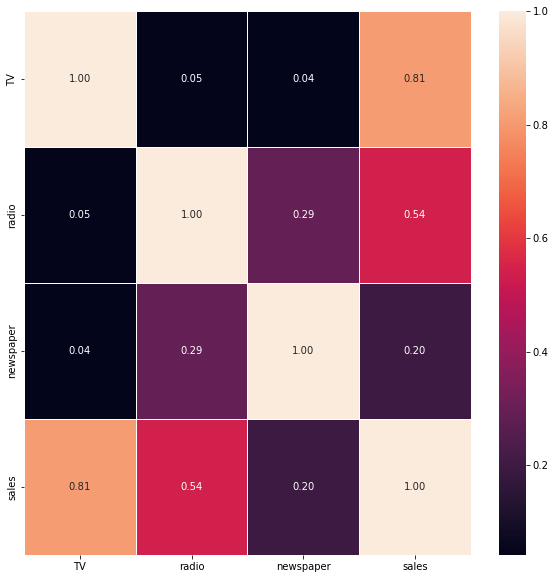

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="white",fmt=".2f")

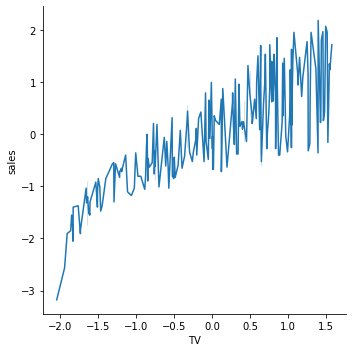

In [85]:
sns.relplot(x="TV", y="sales", kind="line", data=df)

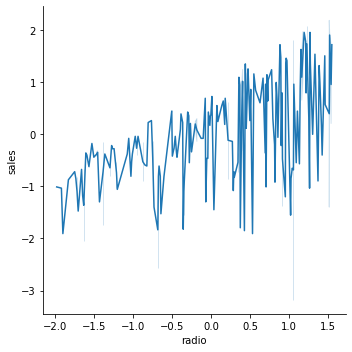

In [86]:
sns.relplot(x="radio", y="sales", kind="line", data=df)

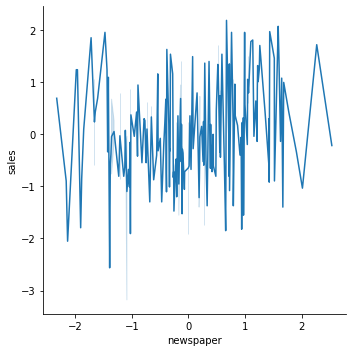

In [87]:
sns.relplot(x="newspaper", y="sales", kind="line", data=df)

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [105]:
X = df.drop('sales', axis=1)
Y = df['sales']

In [106]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [108]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [109]:
# Linear Regression Model
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.2883536997120564
R2 Score is: 93.33190667804972
Cross Validation Score: 90.05787344238998
R2 Score - Cross Validation Score is 3.2740332356597435


In [110]:
# Support Vector Regression
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.5871989318663797
R2 Score is: 72.3483451632845
Cross Validation Score: 77.92092002031498
R2 Score - Cross Validation Score is -5.5725748570304745


In [111]:
# Random Forest Regressor
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.6701407225465624
R2 Score is: 63.98506523425374
Cross Validation Score: 63.445458394500676
R2 Score - Cross Validation Score is 0.5396068397530627


In [112]:
# K Neighbors Regressor
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.6307319072726717
R2 Score is: 68.09636145197919
Cross Validation Score: 59.2183309889567
R2 Score - Cross Validation Score is 8.87803046302249


In [113]:
# Gradient Boosting Regressor
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.31294910305048745
R2 Score is: 92.14587089943076
Cross Validation Score: 91.7403785846943
R2 Score - Cross Validation Score is 0.4054923147364633


In [114]:
# Ada Boost Regressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.2390011098138245
R2 Score is: 95.41910382650862
Cross Validation Score: 95.08003932679759
R2 Score - Cross Validation Score is 0.3390644997110286


In [115]:
# Extra Trees Regressor
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.2718456917353987
R2 Score is: 94.07353774832862
Cross Validation Score: 93.21095310047536
R2 Score - Cross Validation Score is 0.8625846478532537


The End